# ML(머신러닝)

## 학습내용
- 머신러닝 이해
- 기본세팅
- Train 데이터 전처리
- Test 데이터 전처리
- Base 모델
- Train 데이터 분리 
- 모델들
- Train 전체 학습
<hr/>

## 머신러닝 이해

머신러닝이란?
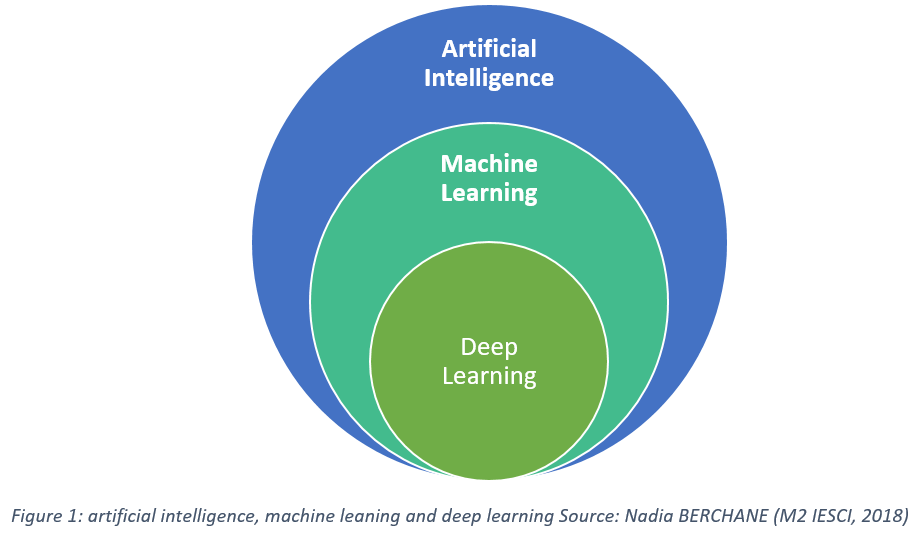

전통적인 접근방식과 머신러닝 모델의 차이
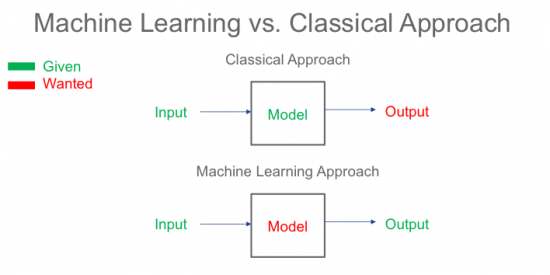

지도학습과 비지도 학습
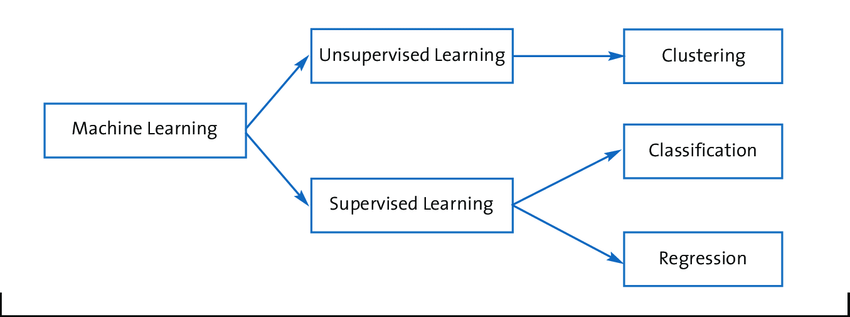

Train, Test, Validation
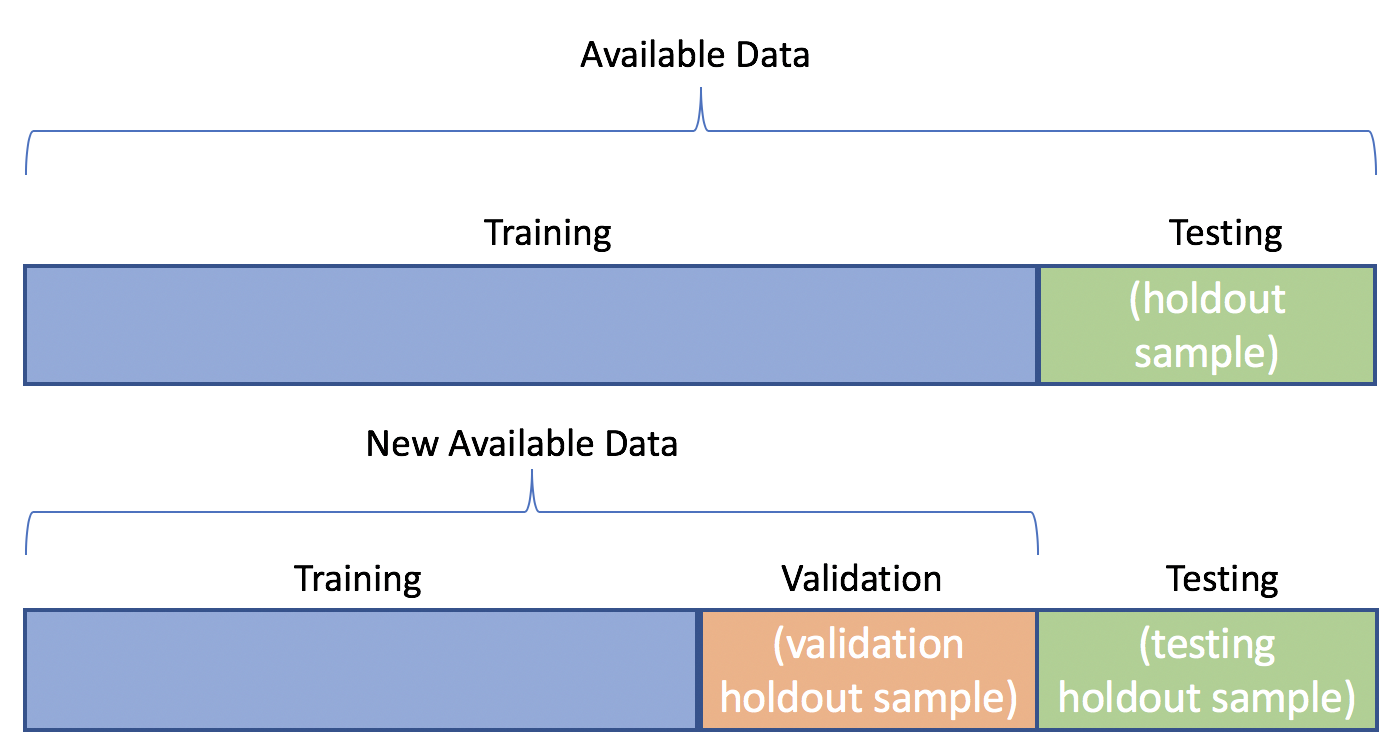

오버피팅과 언더피팅
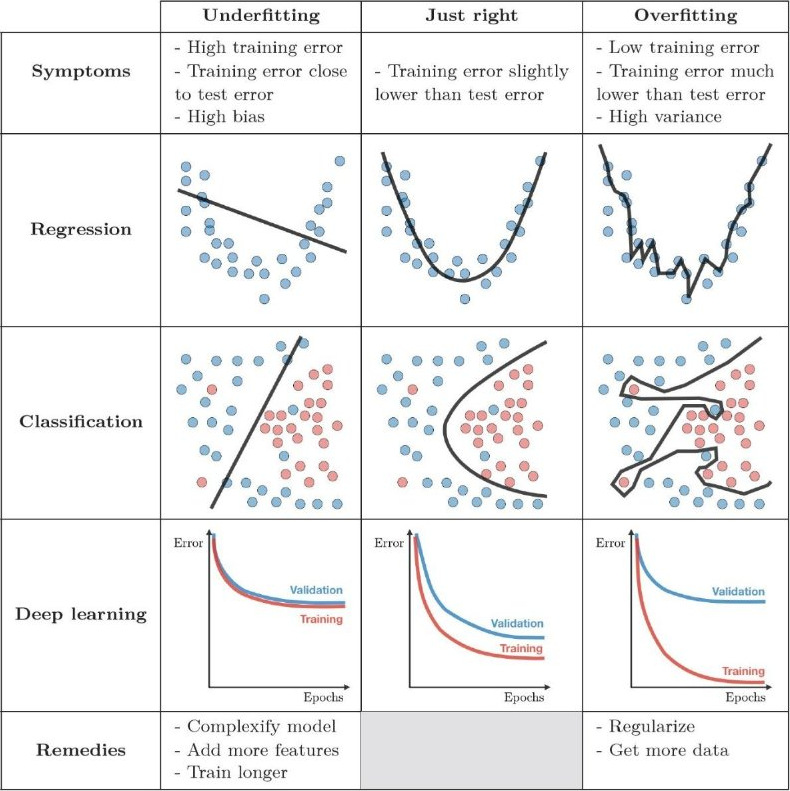

## 기본세팅

In [ ]:
# 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

#경고 메세지 무시
import warnings
warnings.filterwarnings('ignore')

## Train 데이터 전처리
pandas 과제풀이


In [ ]:
train = pd.read_csv("drive/My Drive/Colab Notebooks/youtube/agileML/titanic/data/train.csv")

In [ ]:
def preprocessing(df):
  '''
  - 결측치 처리(Age, Cabin, Embarked)
  - 범주형 데이터 처리(원핫인코딩:Sex, Embarked)
  - PassengerId, Name, Ticket 삭제
  '''
  #결측치 처리
  df['Age'] = df['Age'].fillna(df['Age'].mean())  #age 평균값
  df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  #Embarked 최빈값
  df = df.drop('Cabin', axis=1) #Cabin 삭제

  #범주형 데이터 처리 (원핫 인코딩 후 원본 컬럼은 삭제함)
  df_encoding = pd.get_dummies(df[['Sex','Embarked']])
  df = pd.concat([df, df_encoding], axis=1)
  df = df.drop('Sex', axis=1) #Sex 삭제 
  df = df.drop('Embarked', axis=1) #Embarked 삭제

  #승객번호, 이름, 티켓 삭제
  # df = df.drop('PassengerId', axis=1) #Name 삭제
  df = df.drop('Name', axis=1) #Name 삭제
  df = df.drop('Ticket', axis=1) #Ticket 삭제

  return df

In [ ]:
train = preprocessing(train)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


## Test 데이터 전처리

In [ ]:
test = pd.read_csv("drive/My Drive/Colab Notebooks/youtube/agileML/titanic/data/test.csv")

In [ ]:
test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [ ]:
train.shape, test.shape

((891, 12), (418, 11))

In [ ]:
# Fare 결측치가 보임
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
test = preprocessing(test)
test.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           1
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [ ]:
# Fare에 결측치가 있는 행을 삭제 하면 절대 안됨

In [ ]:
# 중앙값으로 대체
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

In [ ]:
test.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

## Base 모델

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Label 값 분리
target = train['Survived']
X = train.drop(['Survived', 'PassengerId'], axis=1)

In [ ]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
X_test = test.drop(['PassengerId'], axis=1)

In [ ]:
# 모델 학습과 예측
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
# model = RandomForestClassifier()
model.fit(X, target)
predictions = model.predict(X_test)

In [ ]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
# 제출 파일 만들기
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('drive/My Drive/Colab Notebooks/youtube/agileML/ml/MYsubmission2.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [ ]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
# 제출 

** ##################### 끝 ##################### **

## Splitting the Training Data

In [ ]:
from sklearn.model_selection import train_test_split

X = train.drop(['Survived','PassengerId'], axis=1)
target = train["Survived"]

x_train, x_val, y_train, y_val = train_test_split(X, target, test_size = 0.2, random_state = 0)

## 모델들

In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)

acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

79.89


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

79.89


In [ ]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

72.07


In [ ]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

79.89


In [ ]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

75.42


In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

77.65


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

84.36


In [ ]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

72.63


In [ ]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

62.57


In [ ]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

83.8


In [ ]:
# XGBoost Classifier
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_val)
acc_xgb = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_xgb)

83.8


In [ ]:
# LightGBM Classifier
from lightgbm import LGBMClassifier

lgbc = LGBMClassifier()
lgbc.fit(x_train, y_train)
y_pred = lgbc.predict(x_val)
acc_lgbc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_lgbc)

83.8


In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier',
              'XGBClassifier', 'LGBMClassifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk, acc_xgb, acc_lgbc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,84.36
9,Gradient Boosting Classifier,83.80
10,XGBClassifier,83.80
11,LGBMClassifier,83.80
2,Logistic Regression,79.89
4,Naive Bayes,79.89
6,Linear SVC,79.89
7,Decision Tree,77.65
5,Perceptron,75.42
1,KNN,72.63


In [ ]:
ids = test['PassengerId']
predictions = gbk.predict(test.drop('PassengerId', axis=1))


In [ ]:
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('drive/My Drive/Colab Notebooks/youtube/agileML/ml/gbk_submission.csv', index=False)

## Train 전체 학습

In [ ]:
target = train['Survived']
X = train.drop(['Survived', 'PassengerId'], axis=1)
X_test = test.drop(['PassengerId'], axis=1)

In [ ]:
# LightGBM Classifier
lgbc = LGBMClassifier()
lgbc.fit(X, target)
y_pred = lgbc.predict(X_test)

In [ ]:
output = pd.DataFrame({ 'PassengerId' : test['PassengerId'], 'Survived': y_pred })
output.to_csv('drive/My Drive/Colab Notebooks/youtube/agileML/ml/fulldata_lgb_submission.csv', index=False)